In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from matplotlib import cm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
%matplotlib notebook
%matplotlib inline

In [7]:
import sklearn
from sklearn.datasets import load_iris

In [8]:
iris= load_iris()

In [11]:
iris_df = pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names'] + ['target'])

In [12]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width','target']

In [14]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [56]:
X=iris.data[:,:2]
y=(iris.target != 0)*1

In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

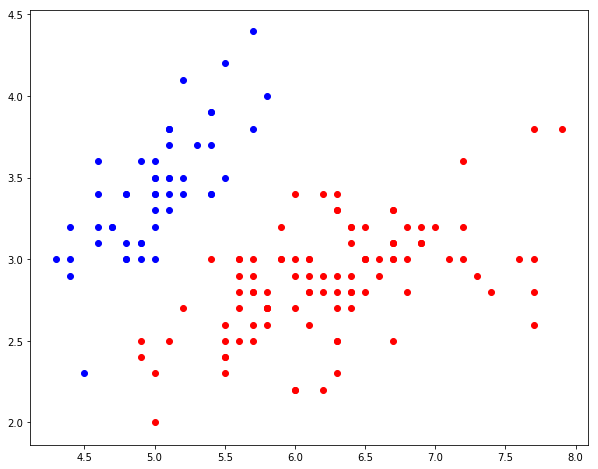

In [58]:
plt.figure(figsize=(10,8))
plt.scatter(x[y==0][:,0],x[y==0][:,1],color='b',label='0')
plt.scatter(x[y==1][:,0],x[y==1][:,1],color='r',label='1')

In [59]:
learning_rate = 0.01
num_iter =20000
fit_intercept =True

def add_intercept(X):
    intercept = np.ones((X.shape[0],1))
    return np.concatenate((intercept,X),axis=1)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost(h,y):
    return (-y* np.log(h)-(1-y)* np.log(1-h)).mean()

def fit(X,y):
    X= add_intercept(X)
    theta=np.zeros(X.shape[1])
    for i in range (num_iter):
        z=np.dot(X,theta)
        h=sigmoid(z)
        gradient = np.dot(X.T ,(h-y))/y.size
        theta = theta - learning_rate* gradient
    return theta

def predict_prob(X,theta):
    X=add_intercept(X)
    return sigmoid(np.dot(X,theta))

def predict(X,theta):
    return predict_prob(X,theta).round()

In [60]:
thetas= fit(X,y)

In [61]:
thetas

array([-1.15564566,  3.7575086 , -6.11493461])

In [62]:
y_pred= predict(X,thetas)

In [63]:
(y_pred == y).mean()

0.9933333333333333

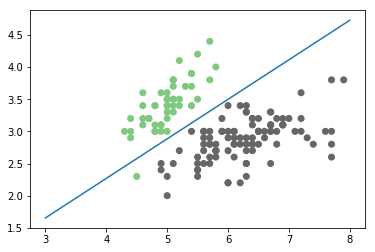

In [65]:
plt.scatter(X[:,0],X[:,1],c=y.reshape(-1),cmap="Accent")
x_vals = np.linspace(3,8,50)
y_vals=-(thetas[0]+thetas[1]*x_vals)/thetas[2]
plt.plot(x_vals,y_vals)